# <center>Practical Lab 9 - Dense Neural Network</center>

### Name: Devarsh Shah
### ID: 8917026
---

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


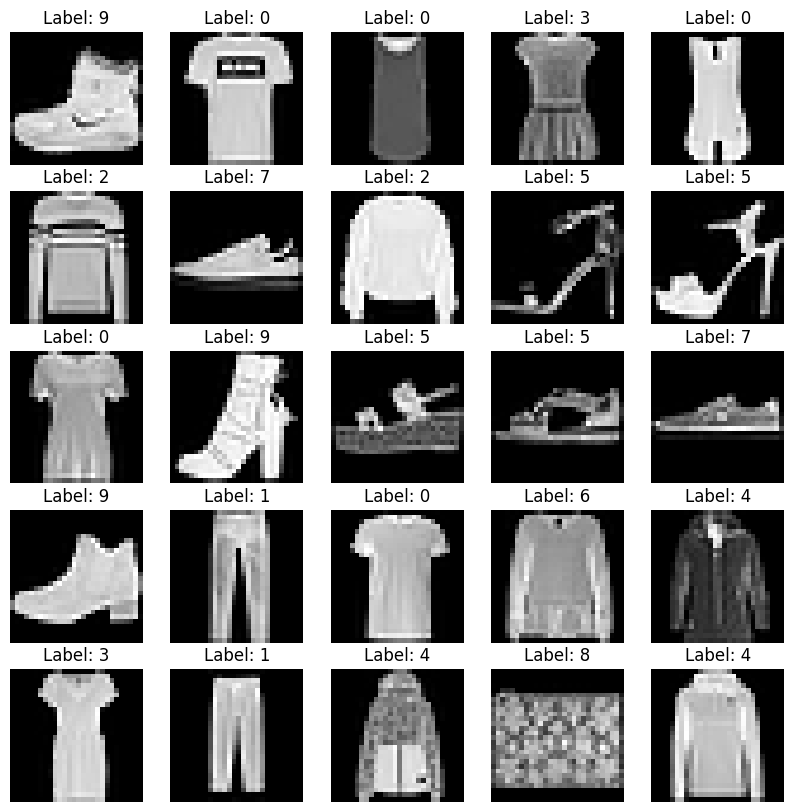

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Explore and describe the dataset
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Sample images of the data
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

>Let's use Normalization and One-Hot encoding for preprocessing the data.

In [6]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. Train a dense neural network using Keras, try out at least three hyperparameters configurations (2 points)

In [11]:
# Function to create and train a dense neural network
def train_dense_nn(units, activation, optimizer, epochs):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2, verbose=0)
    return model

In [12]:
# Train three models with different hyperparameter configurations.
model1 = train_dense_nn(units=128, activation='relu', optimizer='adam', epochs=10)
model2 = train_dense_nn(units=256, activation='sigmoid', optimizer='sgd', epochs=15)
model3 = train_dense_nn(units=64, activation='tanh', optimizer='adam', epochs=12)

# 3. Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [95]:
# Define a function to evaluate and print model performance
def evaluate_model(model):
    y_pred = model.predict(x_test)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_test_labels = np.argmax(y_test, axis=1)
    
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    confusion_mat = confusion_matrix(y_test_labels, y_pred_labels)
    classification_rep = classification_report(y_test_labels, y_pred_labels)
    
    return accuracy, confusion_mat, classification_rep,y_test_labels,y_pred_labels

In [96]:
# Evaluate each model
acc1, cm1, cr1,y_test_1,y_pred_1 = evaluate_model(model1)
acc2, cm2, cr2,y_test_2,y_pred_2 = evaluate_model(model2)
acc3, cm3, cr3,y_test_3,y_pred_3 = evaluate_model(model3)

313/313 [==============================] - 1s 2ms/step


In [42]:
# List of tuples to store model names or indices along with accuracies
accuracies = [('Model1', acc1,cm1,cr1), ('Model2', acc2,cm2,cr2), ('Model3', acc3,cm3,cr3)]

# Find the model with the highest accuracy
best_model = max(accuracies, key=lambda x: x[1])
best_model_name, best_accuracy, best_cm, best_cr = best_model

In [46]:

# Print results
print(f"Best Model: {best_model_name}")
print(f"\nAccuracy: {best_accuracy*100}")
print(f"\nConfusion Matrix:\n{best_cm}")
print(f"\nClassification Report:\n{best_cr}")

Best Model: Model1

Accuracy: 87.49

Confusion Matrix:
[[845   1  28  27   6   0  88   0   5   0]
 [  9 960   3  24   3   0   1   0   0   0]
 [ 14   1 804  15 124   0  42   0   0   0]
 [ 22   4  13 903  38   0  17   0   3   0]
 [  0   0  91  25 863   0  20   0   1   0]
 [  0   0   0   1   0 943   0  33   1  22]
 [145   0 101  38 149   0 557   0  10   0]
 [  0   0   0   0   0   7   0 952   0  41]
 [  8   0  11   4   6   1   3   6 961   0]
 [  1   0   0   1   0   5   0  32   0 961]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.80      0.78      1000
           3       0.87      0.90      0.89      1000
           4       0.73      0.86      0.79      1000
           5       0.99      0.94      0.96      1000
           6       0.77      0.56      0.64      1000
           7       0.93      0.95      0.94      1000
   

# Incorrect Classifications:

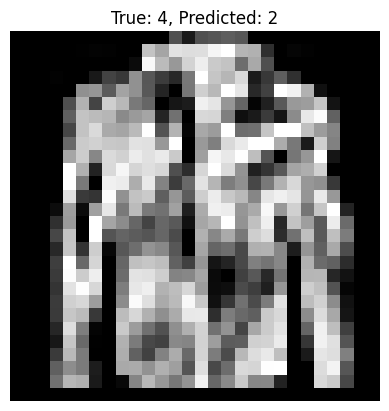

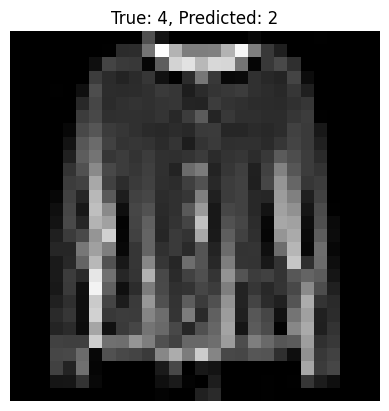

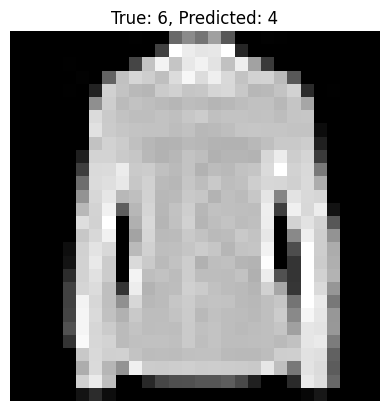

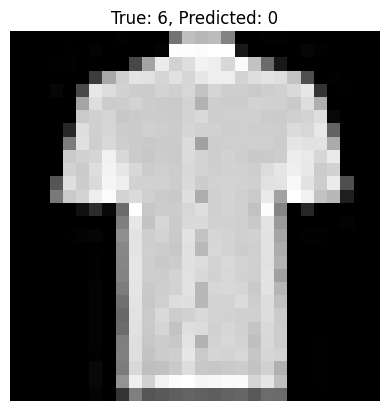

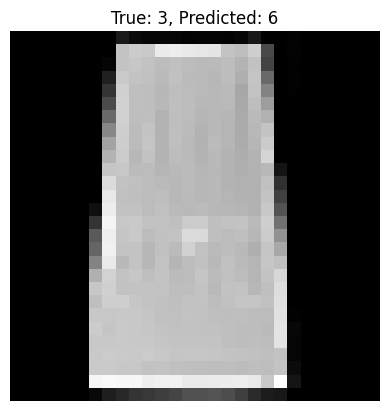

In [99]:
# Find indices where predictions are incorrect
incorrect_indices = np.where(y_test_1 != y_pred_1)[0]

# Display a few examples of incorrect classifications
num_examples_to_display = 5 

for i in range(min(num_examples_to_display, len(incorrect_indices))):
    index = incorrect_indices[i]
    true_label = y_test[index]
    predicted_label = y_pred_1[index]

    # Display the image
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True: {true_label.argmax()}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Conclusion

> In conclusion, Model 1 with hyperparameters `(units=128, activation='relu', optimizer='adam', epochs=10)` appears to be the most effective configuration for the given problem. However, the choice of the best model can depend on various factors, and further exploration may be needed for robust conclusions.